In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [77]:
med = pd.read_csv('med_insurance.csv')
med.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [78]:
med.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [79]:
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [80]:
med.isnull().sum().sum()

0

In [81]:
med.isna().sum().sum()

0

In [83]:
med['sex'].unique()

array(['female', 'male'], dtype=object)

In [84]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
med['sex']= label_encoder.fit_transform(med['sex']) 
med['sex'].unique()

array([0, 1])

In [85]:
med['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [86]:
med['smoker']= label_encoder.fit_transform(med['smoker']) 
med['smoker'].unique()

array([1, 0])

In [87]:
med['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [88]:
med['region']= label_encoder.fit_transform(med['region']) 
med['region'].unique()

array([3, 2, 1, 0])

In [89]:
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [90]:
X= med.drop(columns='charges')
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [91]:
y = med['charges'].values

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [93]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
y_pred = regr.predict(X_test)

In [95]:
dfpred = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
dfpred

,Actual,Predicted
0,9724.53000,10947.914015
1,8547.69130,9764.827331
2,45702.02235,38027.186254
3,12950.07120,16076.266564
4,9644.25250,7003.050939
...,...,...
330,13224.05705,14993.031723
331,4433.91590,6934.890107
332,9377.90470,10983.730535
333,3597.59600,6810.504924


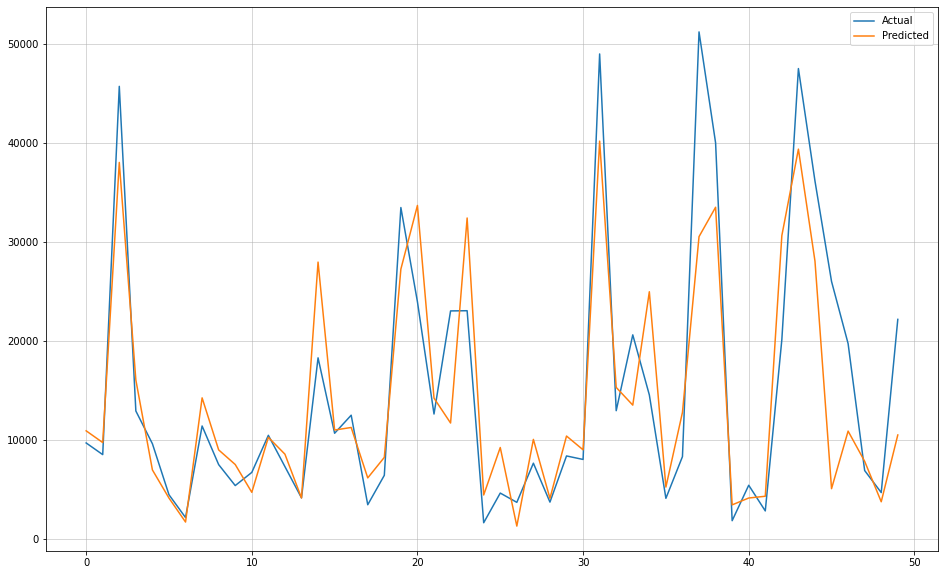

In [96]:
dfpred.head(50).plot(kind='line',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

In [97]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error",mean_squared_error(y_test,y_pred))
print("RootMean Squared Error",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error 3998.2715408869726
Mean Squared Error 32073628.560109198
RootMean Squared Error 5663.358417062193
